<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/3%EC%9E%A5/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

퍼셉트론의 어려운 점은 적절한 가중치를 찾는 것.
신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력을 갖고 있따.


입력신호의 총합을 출력신호로 변환하는 함수를 일반적으로 활성화함수라 한다.

임계값을 경계로 출력이 바뀌는 함수를 계단함수라한다.

그래서 "퍼셉트론에서는 활성화함수로 계단 함수를 이용한다" 라고 함.

In [2]:
#계단함수 구현하기
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

#x가 실수(부동소수점만 받아들인다. 그래서 넘파이 배열을 니수로 넣을 수 없음

In [3]:
#따라서 수정
def step_function(x):
  y=x>0
  return y.astype(np.int)

  #y=x>0 하면 y값은 [False, True, True..]이런식의 배열이 저장됨
  #이것을 y.astype(np.int)라고하면 y는 [0,1,1...]이런 배열이 된다.

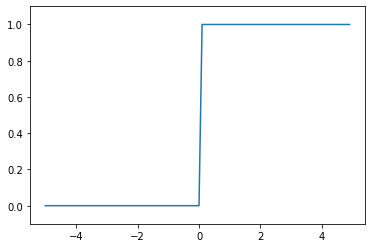

In [4]:
#계단함수의 그래프

import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x>0, dtype=np.int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


In [5]:
#시그모이드 함수 구현
def sigmoid(x):
  return 1/(1+np.exp(-x))

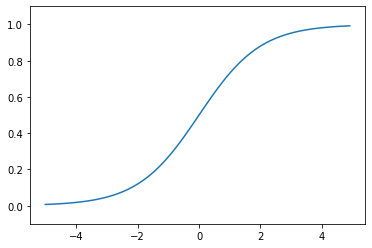

In [6]:
#얘가 넘파이 배열도 처리할 수 있는 이유는 넘파이 브로드캐스트 때문 
#브로드캐스트란 넘파이 배열과 스칼라값의 연산을 넘파이 배열원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [7]:
#계단함수와 시그모이드는 모두 비선형
#신경망에서는 활성화 함수로 선형함수 사용하면 안된다. 층을 깊게 하는 의미가 없어지기 때문
#선형함수는 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 수행할 수 있다.



In [8]:
#relu함수
#입력이 0을 넘으면 그 입력을 그대로 출력하고 0 이하이면 0을 출력하는 함수
def relu(x):
  return np.maximum(0,x)

신경망에서의 행렬곱


In [9]:
#np.dot으로 행렬곱 수행가능
#넘파이의 다차원 배열을 사용해서 입력층에서 1층으로 신호전달하는 것 구현
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])

A1=np.dot(X,W1)+B1

In [10]:
#은닉층에서의 가중치합을 함수로 처리하는 과정
Z1=sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [11]:
#1층에서 2층으로 가는 과정
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


In [12]:
#2층에서 출력층으로 신호 전달

#항등함수 정의. 굳이 정의할 필요없지만 흐름과 통일하기 위해
#출력층의 활성화 함수는 문제의 성질에 맞게정한다
#회귀에는 항등함수, 이진분류에는 시그모이드 함수, 다중클래스분류는 소프트맥스 함수를 사용
def identify_function(x):
  return x

W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])

A3=np.dot(Z2, W3)+B3
Y=identify_function(A3)



In [13]:
#3층 신경망에 대한 구현을 정리. 가중치만 대문자로 쓰고 편향과 중간결과등은 소문자

def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([0.1,0.2])
  return network

def forward(network, x):
  W1,W2,W3=network['W1'], network['W2'], network['W3']
  b1,b2,b3=network['b1'], network['b2'], network['b3']
  a1=np.dot(x, W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2, W3)+b3
  y=identify_function(a3)
  return y
#입력신호를 출력으로 변환하는 처리 과정을 모두 구현한 함수
#순방향 전달이라 forward를 함수명으로 썼다.


network=init_network()
x=np.array([1.0,0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]


In [14]:
#출력층 설계하기

#일반적으로 회귀에는 항등함수, 분류에는 소프트맥스!

In [15]:
#소프트맥스 함수 구현

a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a)
print(exp_a)

sum_exp_a=np.sum(exp_a)
print(sum_exp_a)

y=exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [16]:
def sofmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a
  return y

소프트맥스 함수 구현의 주의점은 바로 오버플로우의 문제. 소프트맥스 함수는 지수 함수를 사용하는데 지수함수란 것이 쉽게 아주 큰 값을 내뱉는다. e^1000은 무한대를 뜻하는 inf값이 된다. 이렇게 큰 값 끼리 나눗셈을 하면 결과 수치가 불안정해진다.

그래서 소프트맥스 함수를 개선했음.
즉, 소프트맥수의 지수함수를 게산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는 다는 것을 이용한다. 어떤 값을 대입해도 좋지만 오버플로를 막을 목적으로는 입력신호 중 최댓값을 이용한다.


In [17]:
def softmax(a):
  c=np.max(a) #입력신호 중 최댓값
  exp_a=np.exp(a-c)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a
  return y

In [18]:
#소프트맥스 함수의 출력은 0에서 1사이의 실수이고. 소프트맥스 함수 출력의 총합은 1이다.
#이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있따.

#소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 지수함수 y=exp(x)가 단조 증가함수이기 때문에!
#신경망을 ㅣ용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.
#결과적으로 신경망으로 분류할때는 출력층의 소프트맥스 함수를 생략해도 된다. 


출력층의 뉴런 수는 ㄴ문제에 맞게 적절히 정해야함. 보통 분류하고 싶은 클래스의 수로 정한다.


In [19]:
#손글씨 숫자 분류 예시
#이미 학습된 매개변수를 사용하여 학습과정은 생략하고(머신러닝은 학습과 추론으로 나뉜다. 학습은 모델을 학습하고 추론은 학습한 모델로 미지의 데이터에서 추론을 수행하는 것)
#추론 과정만 구현할 것 ! 이 추론 과정을 신경망의 순전파라고도 한다.



In [20]:
#MNIST는 28*28 크기의 회색조 이미지(1채널)이며 각 픽셀은 0~255까지의 값을 취한다. 각 이미지에는 그 이미지가 실제 의미하는 숫자가 레이블로 붙어있따.


In [21]:
! ls

sample_data


In [22]:
! cd ..


In [23]:
from tensorflow.keras.datasets import mnist  
(x_train, t_train),(x_test, t_test)=mnist.load_data()
print(x_train.shape)
x_train=x_train.reshape(-1,28*28)
print(x_train.shape)

print(t_train.shape)
print(x_test.shape)
x_test=x_test.reshape(-1,28*28)
print(x_test.shape)

print(t_test.shape)

#입력 이미지를 1차원 배열로 만들었다.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)
(60000,)
(10000, 28, 28)
(10000, 784)
(10000,)


In [25]:
from PIL import Image

def img_show(img):
  pil_img=Image.fromarray(np.uint8(img))
  pil_img.show()
  #넘파이로 저장된 이미지를 PIL용 데이터 객체로 변환해야하는데 이를 .fromarray()가 수행한다.

img=x_train[0]
label=t_train[0]
print(label)

print(img.shape)
img=img.reshape(28,28) #원래의 모양으로 변형
print(img.shape)

img_show(img)


5
(784,)
(28, 28)


신경망의 추론 처리

In [28]:
#해당 신경망은 입력층을 784개, 출력층을 10개로구성한다. 입력층 뉴런이 784개인 이유는 이미지 크기가 28*28-784개이기 때문이고 출력층 뉴런이 10개인건 문제가 0에서 9까지를 구분하는 문제이기 떄문이다.
#은닉층은 총 두 개
#첫 번쨰 은닉층에서는 50개의 뉴런을, 두 번쨰 은닉층에서는 100개의 뉴런을 배치할 것
#50과 100은 임의로 정한 값
def get_data():
  (x_train, t_train),(x_test, t_test)=load_mnist(normalize=True, flatten=True, one_hot_label=Flase)
  #normailize=True는 정규화했다는 뜻임. (전처리)
  return x_test, t_test

def init_network():
  with open('sample_weight.pkl','rb') as f:
    network=pickle.load(f)
  return network

def predict(network, x):
  W1,W2,W3=network['W1'], network['W2'], network['W3']
  b1,b2,b3=network['b1'], network['b2'], network['b3']

  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=softmax(a3)

  return y

#init_networ()에서는 pickle파일인sample_weight에 저장된 학습된 가중치 매개변수를 읽는다.
#이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어있따.



In [ ]:
x,t=get_data()
network=init_network()

accuracy_cnt=0
#정확도로 평가

for i in range(len(x)):
  y=predict(network, x[i])
  p=np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다
  if p==t[i]:
    accuracy_cnt+=1
print("Accuracy:"+ str(float(accuracy_cnt)/len(x)))

#for문을 이용해 이미지 데이터를 한장씩 꺼내 분류한다.
#predict()함수는 각 레이블의 확률을 넘파이배열로 반환한다. 그것을 np.argmax()로 배열에서 값이 가장 큰 원소의 인덱스를 구하는 것(예측 결과)
#마지막으로 정답레이블을 비교하여 맞힌 숫자를 구하고 이를 전체 이미지 숫자로 나눠서 정확도를 구한다.

In [ ]:
#하나로 묶은 입력 데이터 = 배치

#배치 처리를 구현
x,t=get_data()
network=init_network()

batch_size=100
accuracy_cnt=0

for i in range(0, len(x), batch_size):
  x_batch=x[i:i+batch_size]
  y_batch=predict(network, x_batch)
  p=np.argmax(y_batch, axis=1)
  accuracy_cnt+=np.sum(p==t[i:i+batch_size])
print("Accuracy:", str(float(accuracy_ctn)/len(x)))


#입력데이터를 batch_size만큼 묶어서 배치를 만드는 것.
#axis=1은 첫번쨰 차원을 축으로 최댓값으 ㅣ인덱스를 찾도록 한 것입니도( 0번쨰가 첫번쨰 차원임)

In [32]:
#axis=1을 위한 예시
x=np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y=np.argmax(x, axis=1)
print(y)

#긍까 각 행에서 최댓값을 추출했는데 이 뜻이 두 번쨰 차원인 열을 축으로 구했다는 것

[1 2 1 0]
